In [7]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [20]:
directory = 'temp_vad_output'

non_active_percentage = []
active_segments = []
non_active_segments = []

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            length_seconds = data['length_seconds']
            vad_output = data['vad_output']
            
            count = 0
            prev_end = 0
            for segment in vad_output:
                count += segment[1] - segment[0]
                active_segments.append(segment[1] - segment[0])
                
                # Calculate non-active segment size
                if segment[0] > prev_end:
                    non_active_segments.append(segment[0] - prev_end)
                
                prev_end = segment[1]
            
            # Calculate non-active segment size after the last active segment
            if prev_end < length_seconds:
                non_active_segments.append(length_seconds - prev_end)
            
            if count and int(length_seconds):
                temp = (1 - (count/length_seconds))*100
                non_active_percentage.append(temp)

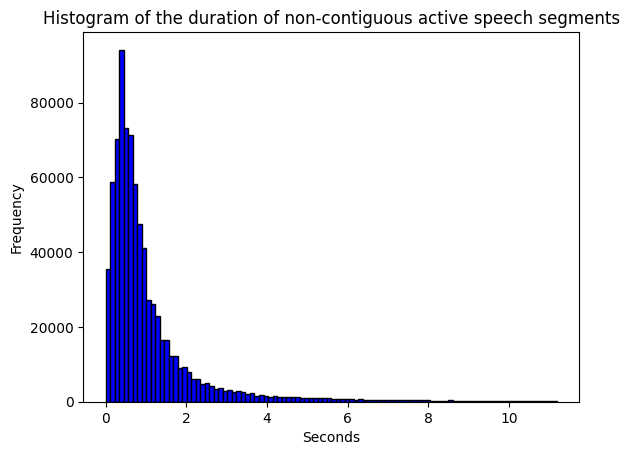

In [25]:
# Histogram of the duration of non-contiguous speech segments
mean = np.mean(non_active_segments)
std_dev = np.std(non_active_segments)
outlier_threshold = 1 * std_dev

filtered_segments = [x for x in non_active_segments if abs(x - mean) <= outlier_threshold]

plt.hist(filtered_segments, bins=100, color='blue', edgecolor='black')

plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Histogram of the duration of contiguous non-active speech segments')

plt.show()

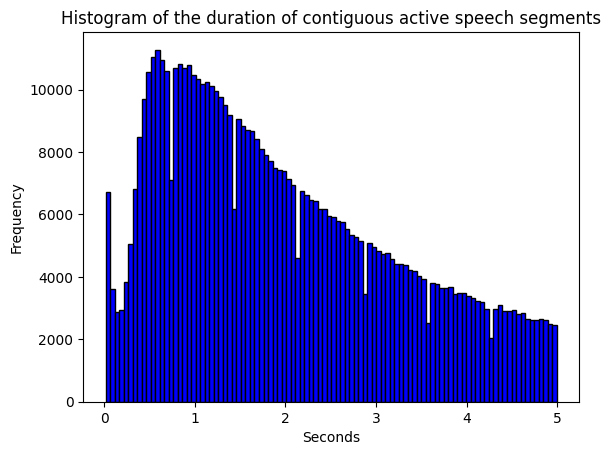

In [26]:
# Histogram of the duration of contiguous speech segments
mean = np.mean(active_segments)
std_dev = np.std(active_segments)
outlier_threshold = 3 * std_dev

filtered_segments = [x for x in active_segments if x <= 5]

plt.hist(filtered_segments, bins=100, color='blue', edgecolor='black')

plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Histogram of the duration of contiguous active speech segments')

plt.show()

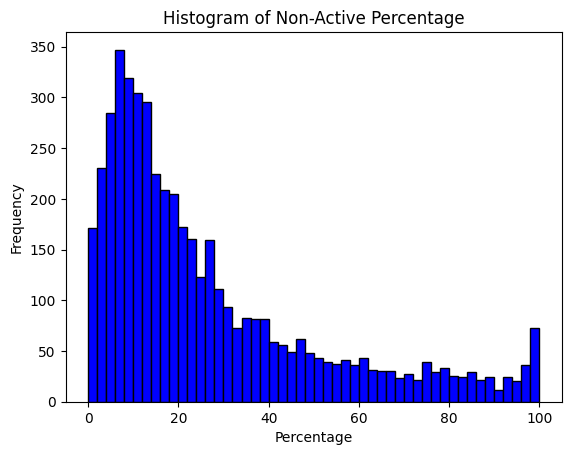

In [5]:
# Histogram of non-speech duration % per clip
plt.hist(non_active_percentage, bins=50, color='blue', edgecolor='black')

plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Non-Active Percentage')

plt.show()